# 0. Magic Commands


In [4]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

# 1. Import Library

In [5]:
from fastai import *
from fastai.vision import *
from fastai.metrics import accuracy

# 2. ข้อมูล

ใช้ชุดข้อมูล Dataset [MNIST](http://yann.lecun.com/exdb/mnist/) ตัวเลขฮินดูอารบิคเขียนด้วยลายมือ

In [6]:
path = untar_data(URLs.MNIST)
path

PosixPath('/home/jupyter/.fastai/data/mnist_png')

แบ่งเป็น Folder training และ testing

In [7]:
path.ls()

[PosixPath('/home/jupyter/.fastai/data/mnist_png/models'),
 PosixPath('/home/jupyter/.fastai/data/mnist_png/training'),
 PosixPath('/home/jupyter/.fastai/data/mnist_png/testing')]

ดูใน Folder training จะเห็นว่ามี Folder แยกตามเลขไว้

In [8]:
(path/'training').ls()

[PosixPath('/home/jupyter/.fastai/data/mnist_png/training/9'),
 PosixPath('/home/jupyter/.fastai/data/mnist_png/training/7'),
 PosixPath('/home/jupyter/.fastai/data/mnist_png/training/2'),
 PosixPath('/home/jupyter/.fastai/data/mnist_png/training/6'),
 PosixPath('/home/jupyter/.fastai/data/mnist_png/training/1'),
 PosixPath('/home/jupyter/.fastai/data/mnist_png/training/4'),
 PosixPath('/home/jupyter/.fastai/data/mnist_png/training/5'),
 PosixPath('/home/jupyter/.fastai/data/mnist_png/training/0'),
 PosixPath('/home/jupyter/.fastai/data/mnist_png/training/8'),
 PosixPath('/home/jupyter/.fastai/data/mnist_png/training/3')]

โครงสร้าง Folder จะเป็นดังนี้

- minst_png
  - training
    - 0
    - 1
    - 2
    - 3
    - 4
    - 5
    - 6
    - 7 
    - 8
    - 9    
 - testing
    - 0
    - 1
    - ...

ลองดูใน Folder ที่เก็บรูปเลข 5

In [15]:
filenames = get_image_files(path/'training/5')
len(filenames), filenames[:10]

(5421,
 [PosixPath('/home/jupyter/.fastai/data/mnist_png/training/5/16358.png'),
  PosixPath('/home/jupyter/.fastai/data/mnist_png/training/5/2478.png'),
  PosixPath('/home/jupyter/.fastai/data/mnist_png/training/5/42337.png'),
  PosixPath('/home/jupyter/.fastai/data/mnist_png/training/5/37823.png'),
  PosixPath('/home/jupyter/.fastai/data/mnist_png/training/5/47494.png'),
  PosixPath('/home/jupyter/.fastai/data/mnist_png/training/5/23312.png'),
  PosixPath('/home/jupyter/.fastai/data/mnist_png/training/5/6004.png'),
  PosixPath('/home/jupyter/.fastai/data/mnist_png/training/5/18298.png'),
  PosixPath('/home/jupyter/.fastai/data/mnist_png/training/5/51844.png'),
  PosixPath('/home/jupyter/.fastai/data/mnist_png/training/5/12519.png')])

ใน Folder training/5 มีไฟล์ชื่อเป็นตัวเลข 5421 ไฟล์

# 3. เตรียมข้อมูล



1. สำหรับข้อมูลประเภทตัวเลข เราไม่สามารถ flip ซ้าย ขวา ขึ้น ลง ได้ จะทำให้ผิดความหมายไป จึงต้องใช้ get_transforms(do_flip=False)
2. เคสนี้ label คือชื่อ Folder ที่บรรจุไฟล์อยู่ เราสามารถ ใช้ ImageDataBunch.from_folder ได้เลย
3. num_workers คือ จำนวน CPU Core ที่ต้องการใช้

In [18]:
batchsize = 128
np.random.seed(0)
transform = get_transforms(do_flip=False)

databunch = ImageDataBunch.from_folder(path, train='training', valid_pct=0.2, size=28, 
                                       ds_tfms=transform, bs=batchsize, num_workers=8).normalize()

## สำรวจข้อมูล ##

ลองดูข้อมูล Batch แรก ด้วย show_batch สั่งให้แสดง รูป พร้อม label ไว้บนรูป แสดง 3 แถว (rows) ในกรอบขนาด 10 x 10 นิ้ว (figsize)

*เราสามารถรัน cell นี้หลายครั้ง เพื่อเรียกดู batch ต่อ ๆ ไป ได้เรื่อย ๆ เป็นการสำรวจข้อมูล*

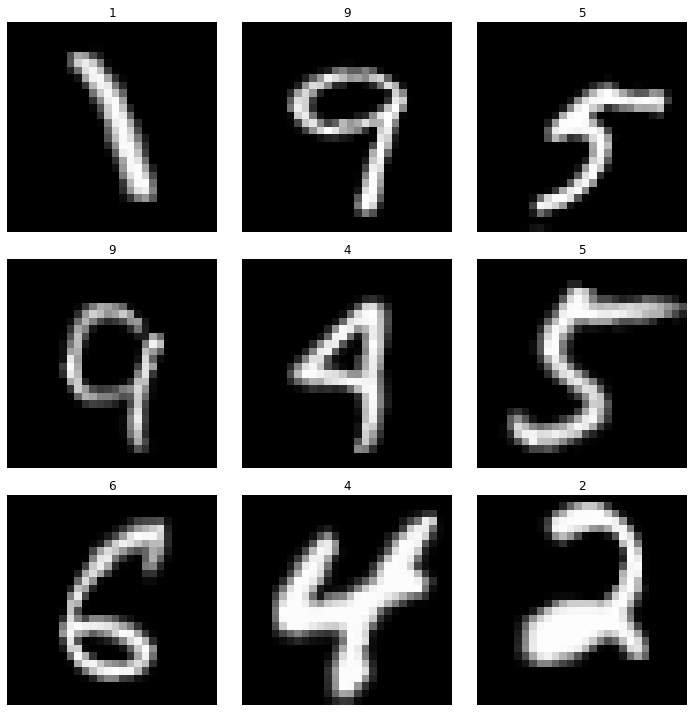

In [20]:
databunch.show_batch(rows=3, figsize=(10, 10))

ดู label ตัวเลขทั้งหมด หรือ class ทั้งหมด ที่มีใน Dataset

In [9]:
databunch.classes

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

# 4. สร้างโมเดล

เนื่องจากรูปเราคราวนี้ขนาดเล็ก และรูปแบบไม่ซับซ้อน ใช้ resnet18 ก็พอ

In [10]:
learner = cnn_learner(databunch, models.resnet18, metrics=accuracy)

# 5. เริ่มต้นเทรนโมเดล

เทรนด้วยค่า Default ไป 4 Cycle

In [11]:
learner.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,0.779039,0.611004,0.804429,00:14
1,0.374637,0.274633,0.912500,00:14
2,0.255548,0.196428,0.936571,00:14
3,0.248589,0.178667,0.943143,00:14


# 6. เทรนต่อ

In [12]:
learner.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


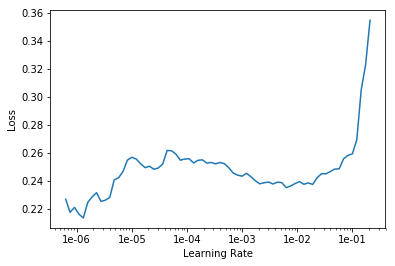

In [13]:
learner.recorder.plot()

In [14]:
learner.unfreeze()

In [15]:
learner.fit_one_cycle(3, max_lr=slice(1e-6, 3e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.141914,0.092159,0.971000,00:15
1,0.087702,0.061525,0.980143,00:14
2,0.067875,0.052204,0.982786,00:14


## สำเร็จแล้ว ##

เพียงแค่เวลา 2 นาที เราเทรน Model ได้ accuracy ประมาณ 0.98 หรือ ความแม่นยำประมาณ 98%


# 7. ดูผลลัพธ์

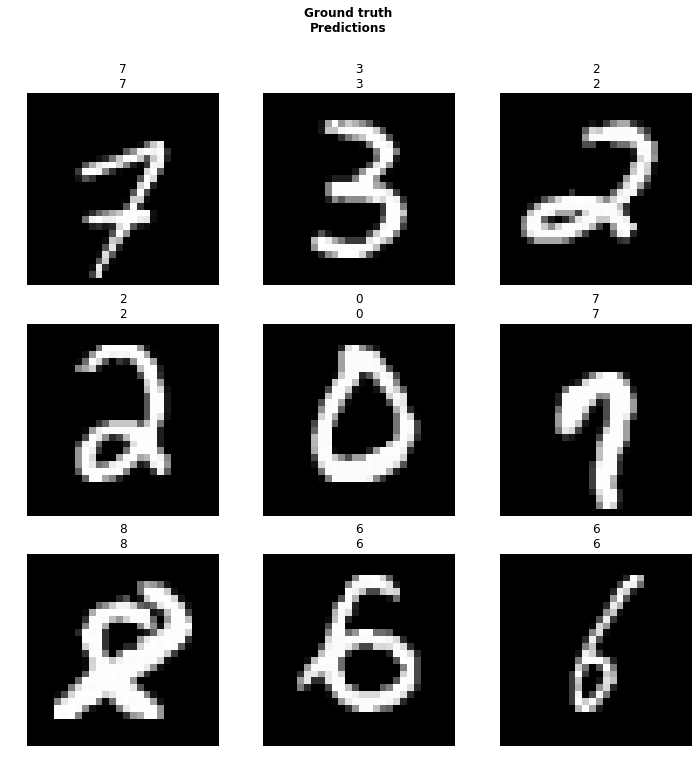

In [16]:
learner.show_results(rows=3)

In [17]:
interpretation = ClassificationInterpretation.from_learner(learner)

แสดงรายการที่โมเดลทายผิด 9 อันดับแรก


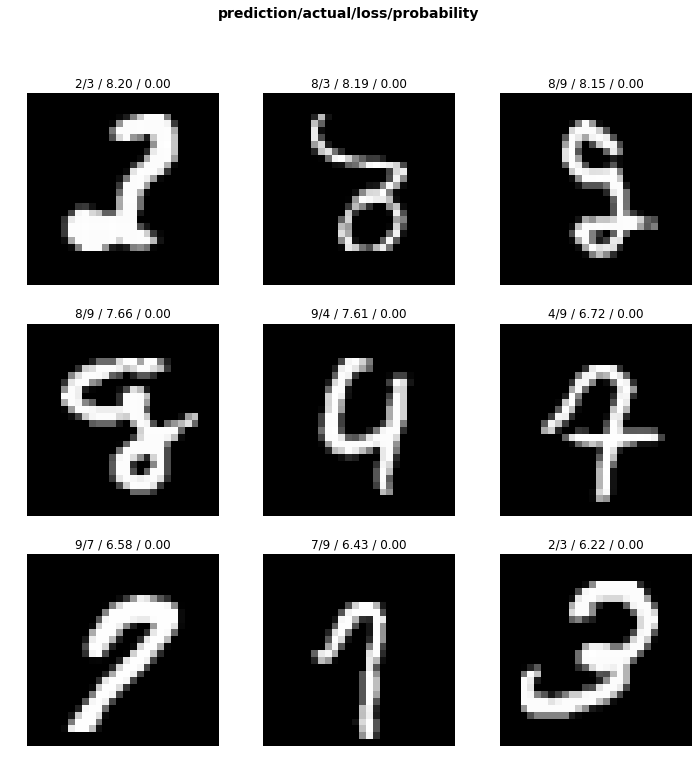

In [18]:
interpretation.plot_top_losses(9)

จะเห็นได้ว่ายากจริง ๆ เนื่องจากบางรูป ลายมือเขียนหวัดมาก อาจจะตีความได้ เลข 4 หรือ 7 หรือ 9 ก็ได้

# 8. เทส

เราได้เตรียมวาดรูปตัวเลข ด้วยโปรแกรม Paint จำนวน 3 รูป และได้อัพโหลดขึ้นไปไว้ใน Server ใน path เดียวกับ Notebook /data

In [14]:
path_test = Path()/'data'

ไฟล์ชื่อ a007.png, a003.png และ a005.png

In [20]:
path_test.ls()

[PosixPath('data/a007.png'),
 PosixPath('data/a003.png'),
 PosixPath('data/a005.png'),
 PosixPath('data/.ipynb_checkpoints')]

## ลองเทส เลข 7

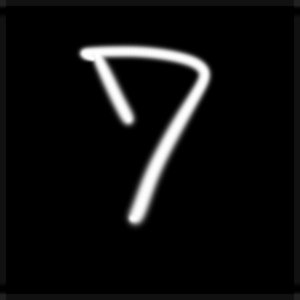

In [15]:
test_image = open_image(path_test/'a007.png')
test_image

In [22]:
learner.predict(test_image)

(Category 7,
 tensor(7),
 tensor([1.0206e-04, 6.6924e-03, 1.3379e-03, 2.7448e-04, 5.7203e-04, 2.4343e-04,
         1.2580e-05, 9.8777e-01, 3.1488e-04, 2.6824e-03]))

In [19]:
databunch.classes

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

สำเร็จแล้ว โมเดลทายว่าเป็นเลข 7 ด้วย ความน่าจะเป็น 9.8777e-01 = 98%

โมเดลทายว่า น่าจะเป็นเลข

-  	0	ด้วย ความน่าจะเป็น	1.02E-04		=		0.010%
-  	1	ด้วย ความน่าจะเป็น	6.69E-03		=		0.669%
-  	2	ด้วย ความน่าจะเป็น	1.34E-03		=		0.134%
-  	3	ด้วย ความน่าจะเป็น	2.74E-04		=		0.027%
-  	4	ด้วย ความน่าจะเป็น	5.72E-04		=		0.057%
-  	5	ด้วย ความน่าจะเป็น	2.43E-04		=		0.024%
-  	6	ด้วย ความน่าจะเป็น	1.26E-05		=		0.001%
-  	7	ด้วย ความน่าจะเป็น	9.88E-01		=		98.777%
-  	8	ด้วย ความน่าจะเป็น	3.15E-04		=		0.031%
-  	9	ด้วย ความน่าจะเป็น	2.68E-03		=		0.268%


## ลองเทส เลข 3

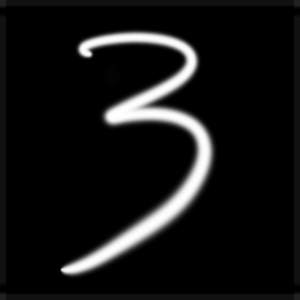

In [16]:
test_image = open_image(path_test/'a003.png')
test_image

In [24]:
learner.predict(test_image)

(Category 3,
 tensor(3),
 tensor([3.8953e-06, 2.0142e-06, 9.3160e-05, 9.9546e-01, 1.6139e-05, 8.5931e-04,
         3.6914e-06, 3.5372e-04, 3.9220e-04, 2.8109e-03]))

สำเร็จแล้ว โมเดลทายว่าเป็นเลข 3 ด้วย ความน่าจะเป็น 9.9546e-01 = 99.5%

## ลองเทส เลข 5

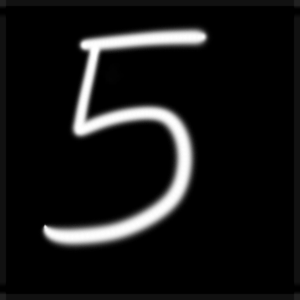

In [17]:
test_image = open_image(path_test/'a005.png')
test_image

In [26]:
learner.predict(test_image)

(Category 5,
 tensor(5),
 tensor([1.1802e-07, 1.6892e-07, 9.6615e-07, 7.8691e-06, 2.1158e-07, 9.9998e-01,
         1.1196e-06, 5.0463e-06, 2.5258e-06, 5.3528e-06]))

สำเร็จแล้ว โมเดลทายว่าเป็นเลข 5 ด้วย ความน่าจะเป็น 9.9998e-01 = 99.9%

# 9. สรุป


1. เราสามารถสร้าง Image Classification ได้ง่าย ๆ ด้วยชุดข้อมูลรูปภาพ, โค้ดไม่กี่บรรทัด และ GPU ไม่กี่นาที
2. แต่อาจจะยังงงอยู่ ว่ามันทำงานอย่างไร ไว้เราจะค่อย ๆ อธิบายต่อไป

# Credit 

* [FastAI: Practical Deep Learning for Coders, v3 - Lesson 1](https://course.fast.ai/videos/?lesson=1)